# Data Preparation
## Economic Indicators Analysis

---

## Data Sources Overview

- **USREC**: NBER Recession Indicators (Monthly)
- **UNRATE**: Unemployment Rate (Monthly)
- **AHETPI**: Average Hourly Earnings (Monthly)
- **PERMIT**: New Housing Units Authorized (Monthly)
- **AAA10Y**: Moody's Aaa Corporate Bond Yield Spread (Daily → Monthly)
- **M2REAL**: Real M2 Money Stock (Monthly)
- **CPIAUCSL**: Consumer Price Index (Monthly)
- **DFF**: Federal Funds Effective Rate (Daily → Monthly)
- **INDPRO**: Industrial Production Index (Monthly)
- **T10Y2Y**: 10Y-2Y Treasury Yield Spread (Daily → Monthly)
- **IC4WSA**: 4-Week Moving Average of Initial Claims (Weekly → Monthly)
- **WTISPLC**: WTI Crude Oil Price (Monthly)
- **MTSDS133FMS**: Federal Surplus/Deficit (Monthly)
- **S&P500CHNG**: S&P 500 Percentage Change (Monthly)

---

## Frequency Adjustment Methods

### Conversion to Monthly Frequency:

| Indicator | Original Frequency | Adjustment Method |
|-----------|-------------------|-------------------|
| AAA10Y    | Daily             | Mean of daily values within each month |
| DFF       | Daily             | Mean of daily values within each month |
| T10Y2Y    | Daily             | Last value of each month |
| IC4WSA    | Weekly            | Mean of weekly values within each month |

---

## Data Description: Recession Indicators

**USREC**:
- NBER-based Recession Indicators
- Units: Binary (0 = Expansion, 1 = Recession)
- Frequency: Monthly
- Source: Federal Reserve Bank of St. Louis

---

## Data Description: Labor Market

**UNRATE**:
- Unemployment Rate
- Units: Percent, Seasonally Adjusted
- Frequency: Monthly
- Source: U.S. Bureau of Labor Statistics

**AHETPI**:
- Average Hourly Earnings of Production and Nonsupervisory Employees
- Units: Dollars per Hour, Seasonally Adjusted
- Frequency: Monthly
- Source: U.S. Bureau of Labor Statistics

**IC4WSA**:
- 4-Week Moving Average of Initial Claims
- Units: Number, Seasonally Adjusted
- Original Frequency: Weekly
- Adjustment: Mean of weekly values within each month
- Source: U.S. Employment and Training Administration

---

## Data Description: Housing & Construction

**PERMIT**:
- New Privately-Owned Housing Units Authorized
- Units: Thousands of Units, Seasonally Adjusted Annual Rate
- Frequency: Monthly
- Source: U.S. Census Bureau & U.S. Department of Housing and Urban Development

---

## Data Description: Interest Rates & Spreads

**AAA10Y**:
- Moody's Aaa Corporate Bond Yield Relative to 10-Year Treasury
- Units: Percent, Not Seasonally Adjusted
- Original Frequency: Daily
- Adjustment: Mean of daily values within each month
- Source: Federal Reserve Bank of St. Louis

**DFF**:
- Federal Funds Effective Rate
- Units: Percent, Not Seasonally Adjusted
- Original Frequency: Daily
- Adjustment: Mean of daily values within each month
- Source: Board of Governors of the Federal Reserve System

**T10Y2Y**:
- 10-Year Treasury Minus 2-Year Treasury Yield Spread
- Units: Percent, Not Seasonally Adjusted
- Original Frequency: Daily
- Adjustment: Last value of each month
- Source: Federal Reserve Bank of St. Louis

---

## Data Description: Money Supply & Inflation

**M2REAL**:
- Real M2 Money Stock
- Units: Billions of 1982-84 Dollars, Seasonally Adjusted
- Frequency: Monthly
- Source: Federal Reserve Bank of St. Louis

**CPIAUCSL**:
- Consumer Price Index for All Urban Consumers
- Units: Index 1982-1984=100, Seasonally Adjusted
- Frequency: Monthly
- Source: U.S. Bureau of Labor Statistics

---

## Data Description: Production & Energy

**INDPRO**:
- Industrial Production Index
- Units: Index 2017=100, Seasonally Adjusted
- Frequency: Monthly
- Source: Board of Governors of the Federal Reserve System

**WTISPLC**:
- West Texas Intermediate Crude Oil Price
- Units: Dollars per Barrel, Not Seasonally Adjusted
- Frequency: Monthly
- Source: Federal Reserve Bank of St. Louis (Spliced Series)

---

## Data Description: Government & Markets

**MTSDS133FMS**:
- Federal Surplus or Deficit
- Units: Millions of Dollars, Not Seasonally Adjusted
- Frequency: Monthly
- Source: U.S. Department of the Treasury

**S&P500CHNG**:
- S&P 500 Percentage Change
- Units: Percent
- Frequency: Monthly
- Source: Yahoo Finance (yfinance)

---

## Data Preparation Process

1. **Collection**: Downloaded from official sources (FRED, Yahoo Finance)
2. **Frequency Conversion**: Daily/weekly → monthly where needed
3. **Quality Check**: Examined for missing values
4. **Time Alignment**: Ensured consistent time periods across indicators
5. **Transformation**: Calculated percentage changes where appropriate


## Next Steps

1. **Merge all indicators** into a single time series dataset
2. **Handle missing values** if any remain
3. **Feature engineering**: Consider adding derived features
4. **Train-test split** for modeling
5. **Normalization/Standardization** as needed for certain algorithms

In [40]:
import yfinance as yf
import pandas as pd

# Download historical data for S&P 500
# df = yf.download('^GSPC', start='1965-01-01', end='2025-05-01', multi_level_index = False, auto_adjust=False)
# df.reset_index(inplace=True)  # Make it no longer an Index
# df.to_csv('data/sp500.csv', index=False)

df = pd.read_csv('data/sp500.csv')

print(df.columns)

df.sort_values(by=['Date'], inplace=True, ascending=True)
df.rename(columns={'Date': 'observation_date'}, inplace=True)

# Step 3: Convert 'observation_date' column to datetime format
df['observation_date'] = pd.to_datetime(df['observation_date'])

# Step 4: Set 'observation_date' as the index
df.set_index('observation_date', inplace=True)

# Step 5: Resample to get the first available value on each month's start
monthly_df = df.resample('MS').mean()

# Step 6: Calculate percentage change based on monthly data
monthly_df['S&P500CHNG'] = monthly_df['Close'].pct_change() * 100
monthly_df['S&P500CHNG'] = monthly_df['S&P500CHNG'].round(2)
monthly_df['Close'] = monthly_df['Close'].round(2)

# Step 7: Drop rows with NaN values introduced by pct_change()
monthly_df = monthly_df.dropna(subset=['S&P500CHNG'])

# Step 8: Reset index for easier handling and save cleaned data
monthly_df.reset_index(inplace=True)
monthly_df_base = monthly_df[['observation_date', 'Close']]

monthly_df = monthly_df[['observation_date', 'S&P500CHNG']]

# Display cleaned data preview
print("Monthly Data Based on First Day of Each Month:")
print(monthly_df.head())

# Save to CSV for further analysis
output_file = 'data/S&P500CHNG_monthly_first_day.csv'
monthly_df.to_csv(output_file, index=False)
print(f"Monthly data saved to '{output_file}'.")

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Monthly Data Based on First Day of Each Month:
  observation_date  S&P500CHNG
0       1965-02-01        0.73
1       1965-03-01        0.10
2       1965-04-01        1.30
3       1965-05-01        1.49
4       1965-06-01       -4.69
Monthly data saved to 'data/S&P500CHNG_monthly_first_day.csv'.


In [41]:
import pandas as pd

# Step 1: Read weekly IC4WSA data
df_ic4wsa = pd.read_csv('data/IC4WSA.csv')

# Step 2: Convert 'observation_date' column to datetime format
df_ic4wsa['observation_date'] = pd.to_datetime(df_ic4wsa['observation_date'])

# Step 3: Set 'observation_date' as the index
df_ic4wsa.set_index('observation_date', inplace=True)

# Step 4: Resample to monthly frequency and take the first week's value
monthly_ic4wsa = df_ic4wsa.resample('MS').first()

# Step 5: Reset index for easier handling
monthly_ic4wsa.reset_index(inplace=True)

# Step 6: Save to CSV for further analysis
output_file = 'data/IC4WSA_monthly_first_day.csv'
monthly_ic4wsa.to_csv(output_file, index=False)
print(f"Monthly data saved to '{output_file}'.")


Monthly data saved to 'data/IC4WSA_monthly_first_day.csv'.


In [42]:
# T10Y2Y (10-Year Treasury Minus 2-Year Treasury Yield Spread)
# Source FRED
# Adjustment: Take the last value of each month.


import pandas as pd

# Step 1: Read data
df_t10y2y = pd.read_csv('data/T10Y2Y.csv')
df_t10y2y['observation_date'] = pd.to_datetime(df_t10y2y['observation_date'])
df_t10y2y.set_index('observation_date', inplace=True)

# Resample to monthly frequency and take the last value
monthly_t10y2y = df_t10y2y.resample('MS').last()

# Reset index for easier handling
monthly_t10y2y.reset_index(inplace=True)

# Save to CSV for further analysis
output_file = 'data/T10Y2Y_monthly_first_day.csv'
monthly_t10y2y.to_csv(output_file, index=False)
print(f"Monthly data saved to '{output_file}'.")

Monthly data saved to 'data/T10Y2Y_monthly_first_day.csv'.


In [43]:
# AAA10Y (Moody's Aaa Corporate Bond Yield Spread)
# Adjustment: Take the mean of daily values within each month.

#Read data
df_aaa10y = pd.read_csv('data/AAA10Y.csv')


df_aaa10y['observation_date'] = pd.to_datetime(df_aaa10y['observation_date'])
df_aaa10y.set_index('observation_date', inplace=True)

# Resample to monthly frequency and take the mean
monthly_aaa10y = df_aaa10y.resample('MS').mean()

# Reset index for easier handling
monthly_aaa10y.reset_index(inplace=True)

# Save to CSV for further analysis
output_file = 'data/AAA10Y_monthly_first_day.csv'
monthly_aaa10y.to_csv(output_file, index=False)
print(f"Monthly data saved to '{output_file}'.")


Monthly data saved to 'data/AAA10Y_monthly_first_day.csv'.


In [44]:
# DFF
# Adjustment: Take the mean of daily values within each month.

#Read data
df_dff = pd.read_csv('data/DFF.csv')

df_dff['observation_date'] = pd.to_datetime(df_dff['observation_date'])
df_dff.set_index('observation_date', inplace=True)

# Resample to monthly frequency and take the mean
monthly_dff = df_dff.resample('MS').mean()

# Reset index for easier handling
monthly_dff.reset_index(inplace=True)

# Save to CSV for further analysis
output_file = 'data/DFF_monthly_first_day.csv'
monthly_dff.to_csv(output_file, index=False)
print(f"Monthly data saved to '{output_file}'.")

Monthly data saved to 'data/DFF_monthly_first_day.csv'.


In [45]:
from pathlib import Path
from functools import reduce


def merge_economic_data(csv_files, folder = ''):
    """
    Merge multiple economic data files into a single DataFrame.
    """
    dataframes = []
    for file in csv_files:
        try:
            series_name = Path(file).stem
            df = pd.read_csv(folder + '/' + file)
            dataframes.append(df)
        except Exception as e:
            print(f"Error processing {file}: {e}")
    
    # Merge all dataframes
    merged = reduce(lambda left, right: pd.merge(left, right, on='observation_date', how='outer'), 
                   dataframes)
    
    # Final sort and cleanup
    merged = merged.sort_values('observation_date')
    
    return merged

if __name__ == "__main__":
    csv_files = ['USREC.csv', 'UNRATE.csv', 'AHETPI.csv', 'PERMIT.csv', 'AAA10Y_monthly_first_day.csv',
         'M2REAL.csv', 'CPIAUCSL.csv', 'DFF_monthly_first_day.csv', 'INDPRO.csv', 'T10Y2Y_monthly_first_day.csv',
         'IC4WSA_monthly_first_day.csv', 'WTISPLC.csv', 'MTSDS133FMS.csv', 'S&P500CHNG_monthly_first_day.csv']
    result = merge_economic_data(csv_files, 'data')
    # Save the merged data
    output_file = 'data/merged_economic_data_final.csv'
    result.to_csv(output_file, index=False)
    print(f"Monthly data saved to '{output_file}'.")

Monthly data saved to 'data/merged_economic_data_final.csv'.


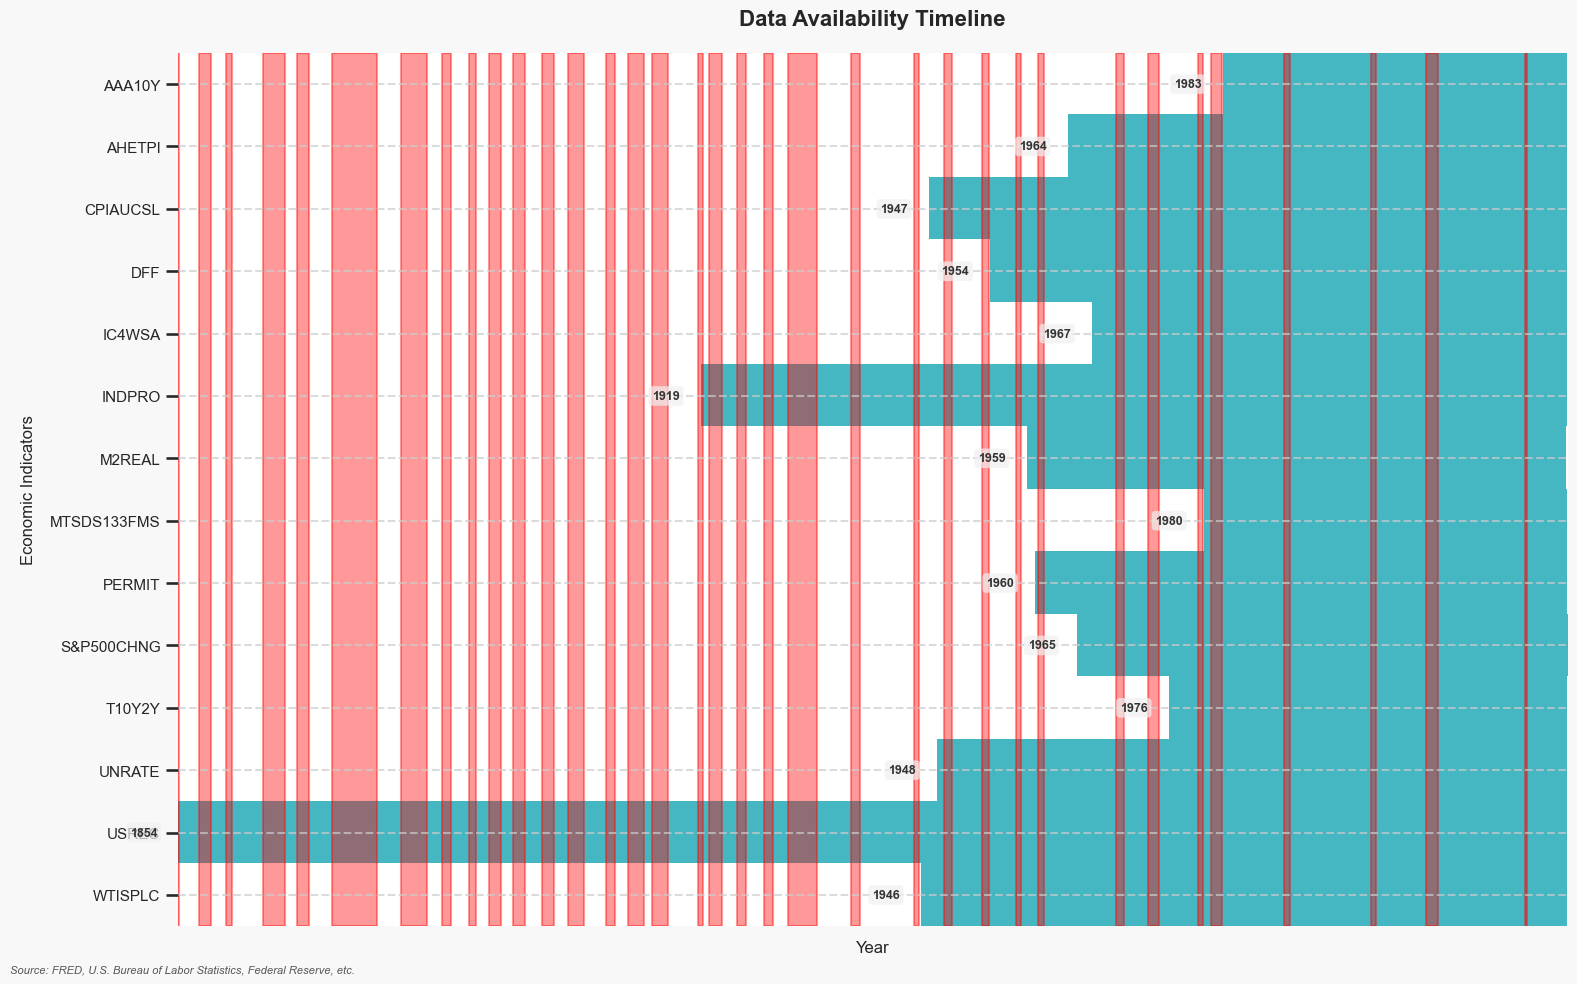

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")

# Load the dataset
file_path = 'data/merged_economic_data_final.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Convert 'observation_date' column to datetime
df['observation_date'] = pd.to_datetime(df['observation_date'])

# Set start and end dates
start_date = '1796-01-01'
end_date = df['observation_date'].max()  # Use the most recent date in your data

# Filter the dataset to include only data from 1929 onwards
df = df[(df['observation_date'] >= start_date) & (df['observation_date'] <= end_date)]

# Set 'observation_date' as the index for easier handling
df.set_index('observation_date', inplace=True)

# Sort columns alphabetically for better presentation
df = df.reindex(sorted(df.columns), axis=1)

# Create a binary mask for data availability (1 if not NaN, 0 if NaN)
data_availability = df.notnull().astype(int)

# Find the first date of data availability for each column
first_data_points = df.apply(lambda col: col.first_valid_index())

# Create a custom colormap (white to dark green)
colors = ["#ffffff",'#45b7c2']
custom_cmap = LinearSegmentedColormap.from_list("custom_green", colors, N=256)

# Create the figure with specified dimensions
fig, ax = plt.subplots(figsize=(16, 10))

# Plot data availability with the custom colormap
im = ax.imshow(data_availability.T, aspect='auto', cmap=custom_cmap, interpolation='none')

# # Add a color bar
# cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.01)
# cbar.set_ticks([0, 1])
# cbar.set_ticklabels(['Missing', 'Available'])
# cbar.ax.tick_params(labelsize=10)

# Customize the y-axis (variables)
ax.set_yticks(range(data_availability.columns.size))
ax.set_yticklabels(data_availability.columns, fontsize=11)

# Create decade markers for x-axis
years = pd.date_range(start=start_date, end=end_date, freq='10YE')
tick_positions = [df.index.get_loc(date, method='nearest') for date in years if date in df.index]
tick_labels = [date.strftime('%Y') for date in years if date in df.index]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right', fontsize=10)

# Add recession shading if USREC is available in the data
if 'USREC' in df.columns:
    recession_periods = []
    in_recession = False
    start_recession = None
    
    for date, value in df['USREC'].items():
        if not in_recession and value == 1:
            in_recession = True
            start_recession = date
        elif in_recession and value == 0:
            in_recession = False
            recession_periods.append((start_recession, date))
    
    # If still in recession at the end of the data
    if in_recession:
        recession_periods.append((start_recession, df.index[-1]))
    
    # Shade recession periods
    for start, end in recession_periods:
        start_idx = df.index.get_loc(start)
        end_idx = df.index.get_loc(end)
        ax.axvspan(start_idx, end_idx, alpha=0.4, color='red', zorder=0)

# Add a title and labels with custom fonts
ax.set_title('Data Availability Timeline', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12, labelpad=10)
ax.set_ylabel('Economic Indicators', fontsize=12, labelpad=10)

# Add annotations for the first appearance of each variable
for i, column in enumerate(data_availability.columns):
    first_date = first_data_points[column]
    if first_date is not None:
        year = first_date.year
        idx = df.index.get_loc(first_date)
        ax.annotate(f'{year}', xy=(idx, i), xytext=(-15, 0), 
                   textcoords="offset points", ha='right', va='center',
                   fontsize=9, color='#333333', fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.3", fc="#f0f0f0", ec="none", alpha=0.7))

# Add a grid on the y-axis only
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Add a subtle border around the plot
fig.patch.set_facecolor('#f8f8f8')
ax.set_facecolor('#fcfcfc')

# Add footer with data source information
plt.figtext(0.01, 0.01, 'Source: FRED, U.S. Bureau of Labor Statistics, Federal Reserve, etc.', 
           fontsize=8, style='italic', color='#555555')

plt.tight_layout()

# Show the plot
# plt.savefig('data_availability_timeline.png', dpi=300, bbox_inches='tight')
plt.show()